## PAW wavelet decomposition

In [1]:
prefix = '/home/ines/repositories/'
# prefix = '/Users/ineslaranjeira/Documents/Repositories/'

In [2]:
""" 
IMPORTS
"""
import os
os.environ["JAX_PLATFORM_NAME"] = "cpu"
import numpy as np
import pandas as pd
from one.api import ONE
from sklearn.manifold import TSNE
from scipy import stats


# Get my functions
from functions import idxs_from_files, plot_kde, GMM_neg_log_likelihood

one = ONE(mode='remote')

In [3]:
""" 
LOAD DATA AND PARAMETERS
"""
# LOAD DATA
var = 'wheel'

data_path = prefix + 'representation_learning_variability/paper-individuality/data/design_matrices/'
all_files = os.listdir(data_path)
design_matrices = [item for item in all_files if 'design_matrix' in item and 'standardized' not in item]
idxs, mouse_names = idxs_from_files(design_matrices)

if var == 'paw':
    wavelet_path = prefix + 'representation_learning_variability/paper-individuality/data/paw_wavelets/'
elif var == 'wheel':
    wavelet_path = prefix + 'representation_learning_variability/paper-individuality/data/wheel_wavelets/'

velocity = True

In [4]:
# Loop through animals
files = os.listdir(wavelet_path)
sessions_to_process = []

for m, mat in enumerate(idxs):
    mouse_name = mat[37:]
    session = mat[:36]

    """ SAVE DATA """       
    # Save wavelets
    if var == 'paw':
        if velocity:
            subname = "paw_vel_wavelets_"
        else:
            subname = "paw_pos_wavelets_"
    elif var == 'wheel':
        subname = 'wheel_vel_wavelets_'
    
    filename = subname + str(session) + '_'  + mouse_name

    if filename in files:
        sessions_to_process.append((mouse_name, session))
    
print(len(sessions_to_process))

218


# Subsample

In [5]:
if var == 'paw':
    var_interest = ['l_paw_x', 'l_paw_y', 'r_paw_x', 'r_paw_y', 
                    'l_paw_x0.5', 'l_paw_x1.0', 'l_paw_x2.0', 'l_paw_x4.0', 'l_paw_x8.0', 'l_paw_x16.0', 'l_paw_x32.0',
                    'l_paw_y0.5', 'l_paw_y1.0', 'l_paw_y2.0', 'l_paw_y4.0', 'l_paw_y8.0', 'l_paw_y16.0', 'l_paw_y32.0',
                    'r_paw_x0.5', 'r_paw_x1.0', 'r_paw_x2.0', 'r_paw_x4.0', 'r_paw_x8.0', 'r_paw_x16.0', 'r_paw_x32.0',
                    'r_paw_y0.5', 'r_paw_y1.0', 'r_paw_y2.0', 'r_paw_y4.0', 'r_paw_y8.0', 'r_paw_y16.0', 'r_paw_y32.0']
elif var == 'wheel':
    var_interest = ['avg_wheel_vel0.5', 'avg_wheel_vel1.0', 'avg_wheel_vel2.0', 'avg_wheel_vel4.0', 'avg_wheel_vel8.0', 
                    'avg_wheel_vel16.0', 'avg_wheel_vel32.0',
                    ]


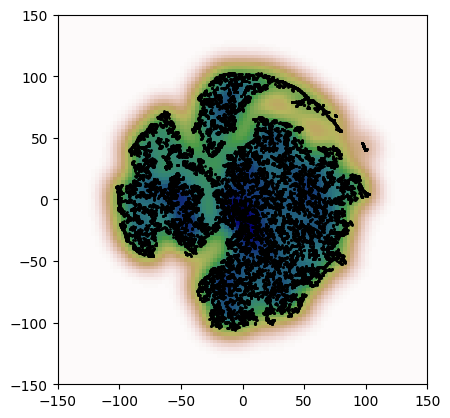

('ZFM-02372', '88224abb-5746-431f-9c17-17d7ef806e6a')


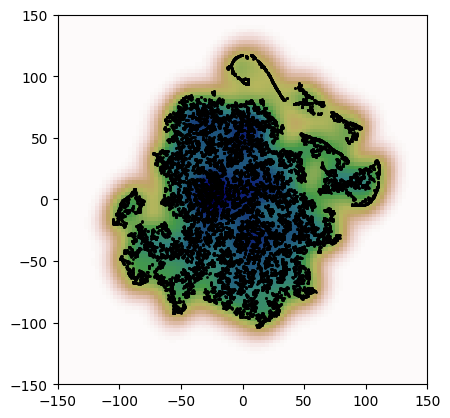

('SWC_054', '671c7ea7-6726-4fbe-adeb-f89c2c8e489b')


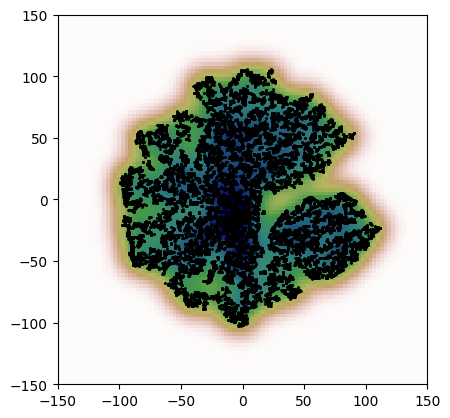

('PL033', '9fc31d79-b56f-46d0-92a0-e9563caf4a7a')


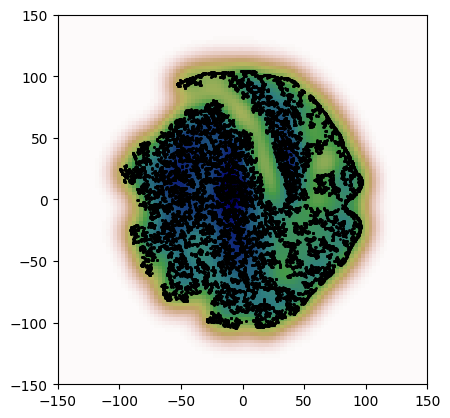

('CSH_ZAD_026', '15763234-d21e-491f-a01b-1238eb96d389')


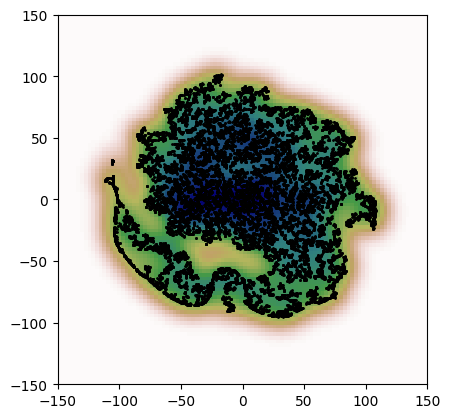

('NR_0027', 'ae8787b1-4229-4d56-b0c2-566b61a25b77')


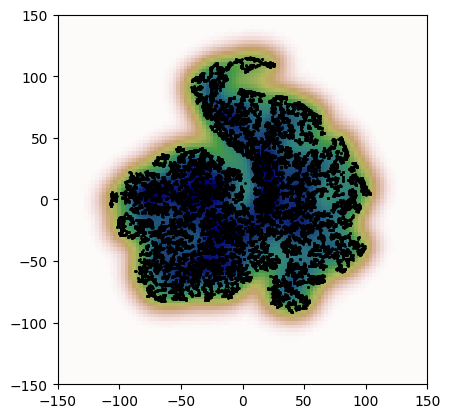

('ZFM-01936', '2c44a360-5a56-4971-8009-f469fb59de98')


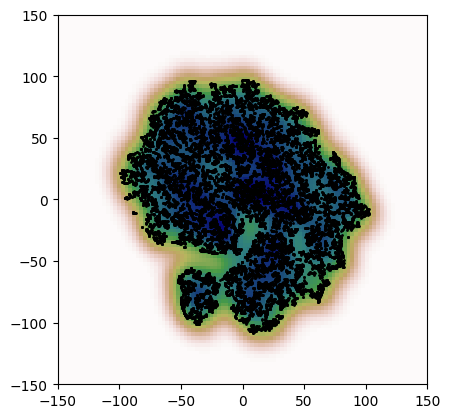

('PL033', 'a34b4013-414b-42ed-9318-e93fbbc71e7b')


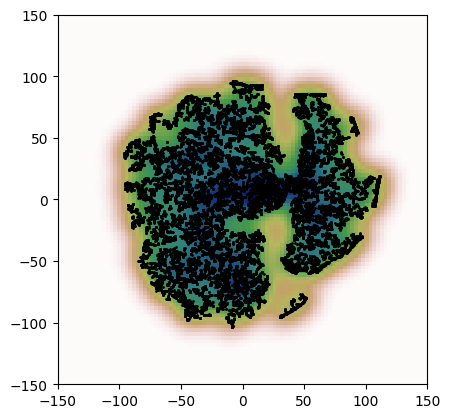

('SWC_043', '6f09ba7e-e3ce-44b0-932b-c003fb44fb89')


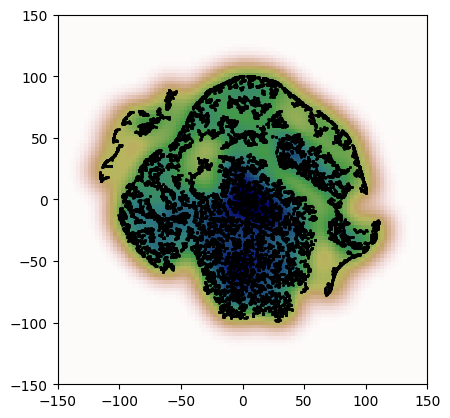

('CSH_ZAD_026', 'e56541a5-a6d5-4750-b1fe-f6b5257bfe7c')


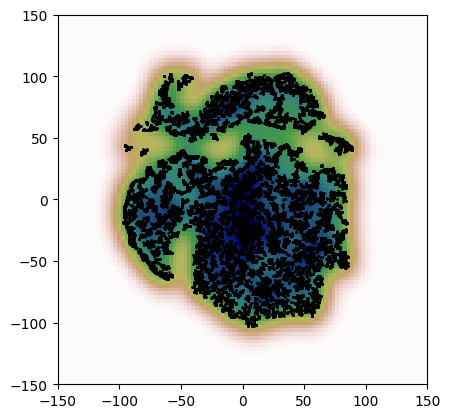

('ibl_witten_29', '821f1883-27f3-411d-afd3-fb8241bbc39a')


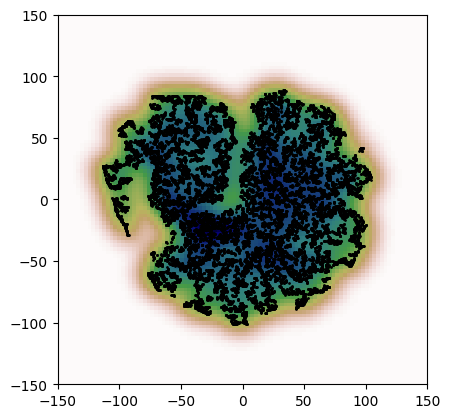

('NYU-47', 'fc43390d-457e-463a-9fd4-b94a0a8b48f5')


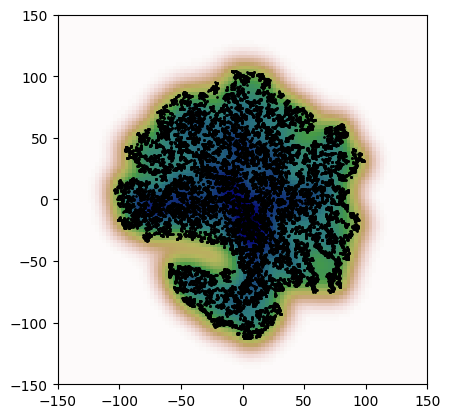

('PL033', '49250fba-801c-4867-a0a7-a1e19538cb61')


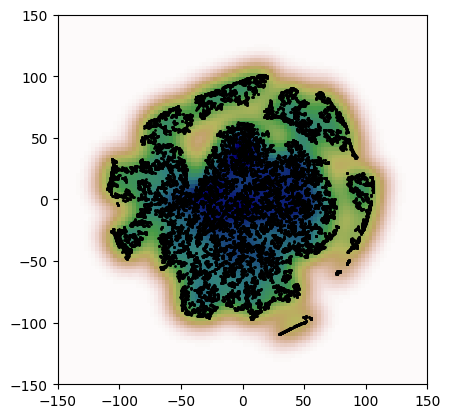

('SWC_054', '56b57c38-2699-4091-90a8-aba35103155e')


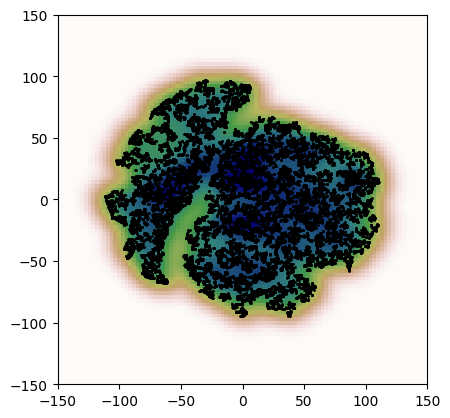

('DY_020', '9fe512b8-92a8-4642-83b6-01158ab66c3c')


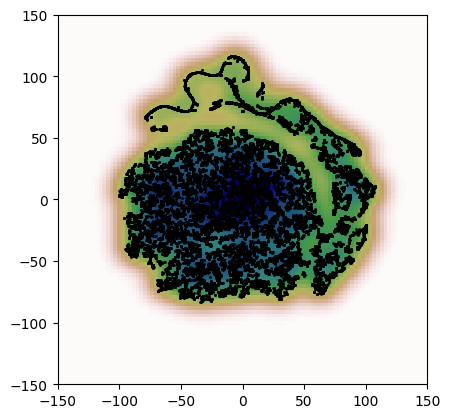

('NR_0027', '6c6b0d06-6039-4525-a74b-58cfaa1d3a60')


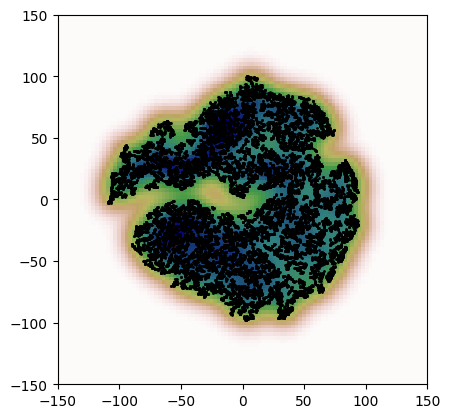

('ibl_witten_32', '08102cfc-a040-4bcf-b63c-faa0f4914a6f')


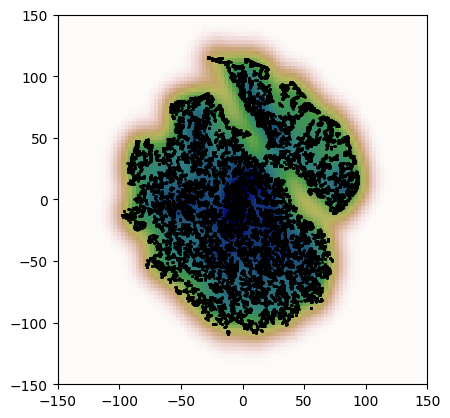

('SWC_058', '9545aa05-3945-4054-a5c3-a259f7209d61')


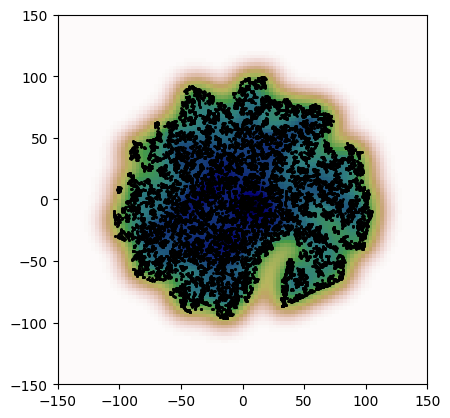

('UCLA037', '8d316998-28c3-4265-b029-e2ca82375b2f')


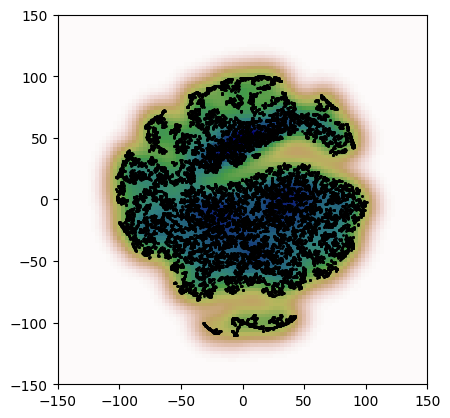

('UCLA017', 'bb099402-fb31-4cfd-824e-1c97530a0875')


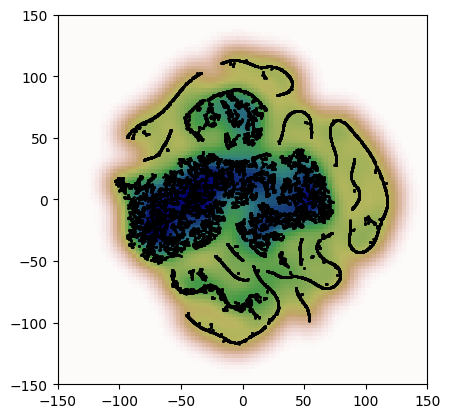

('UCLA034', '19b44992-d527-4a12-8bda-aa11379cb08c')


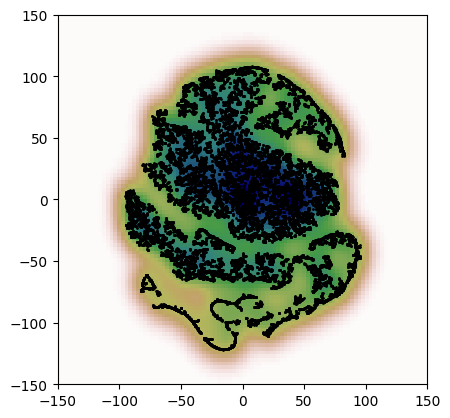

('ZFM-01936', 'd0ea3148-948d-4817-94f8-dcaf2342bbbe')


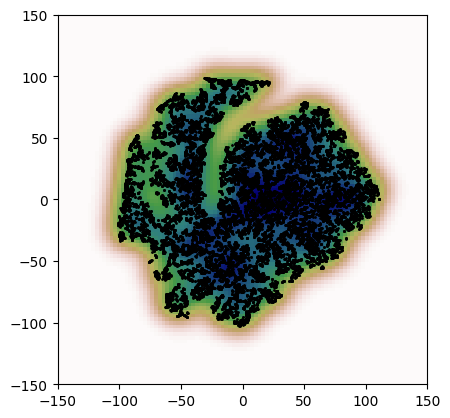

('CSH_ZAD_019', '49e0ab27-827a-4c91-bcaa-97eea27a1b8d')


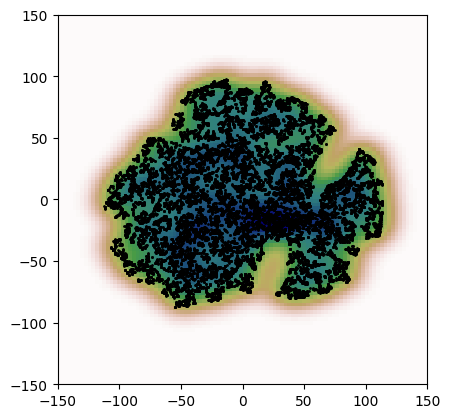

('UCLA048', 'dc962048-89bb-4e6a-96a9-b062a2be1426')


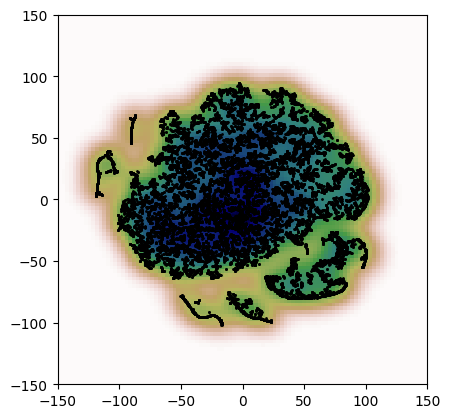

('SWC_054', '6bb5da8f-6858-4fdd-96d9-c34b3b841593')


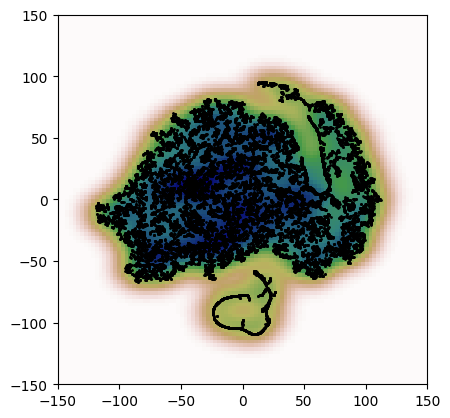

('UCLA037', '2bdf206a-820f-402f-920a-9e86cd5388a4')


KeyboardInterrupt: 

In [6]:
concatenated_subsampled = np.array([])
assert len(sessions_to_process) == 218
for m, mat in enumerate(sessions_to_process):

    mouse_name = mat[0]
    session = mat[1]
    filename = wavelet_path + subname + str(session) + '_'  + mouse_name
    design_matrix = pd.read_parquet(filename)

    # Prepare data
    data_df = design_matrix[var_interest].copy().dropna()
    data = np.array(data_df)
    
    """ Randomly subsample """
    n_samples = 20000
    sampled_indices = np.random.choice(data.shape[0], 
                                       n_samples, 
                                       replace=False)
    sampled_data = data[sampled_indices, :]
    
    """ Perform t-SNE """
    X = sampled_data.copy()
    X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=32).fit_transform(X)
    # plt.scatter(X_embedded[:, ], X_embedded[:, 1], alpha=0.02)
    # plt.show()
    
    """ Perform Gaussian kde """
    values = X_embedded.T.copy()
    kernel = stats.gaussian_kde(values)
    plot_kde(X_embedded, kernel)
    
    """ Resample weighted by kde estimate """
    sample_prob = kernel(values)
    norm_sample_prob = sample_prob/ np.sum(sample_prob)
    resampled_indices = np.random.choice(sampled_data.shape[0], 
                                    size=2000, 
                                    p=norm_sample_prob, replace=False)
    resampled_data = sampled_data[resampled_indices, :]
    
    """ Concatenate session """
    if len(concatenated_subsampled) == 0:
        concatenated_subsampled = resampled_data.copy()
    else:
        concatenated_subsampled = np.vstack([concatenated_subsampled, resampled_data])
    
    print(mat)

In [19]:
path = prefix + 'representation_learning_variability/paper-individuality/fig1_segmentation/'
np.save(open(path+'supersession_wavelets_wheel09-25-2025', 'wb'), concatenated_subsampled)

In [41]:
path = prefix + 'representation_learning_variability/paper-individuality/fig1_segmentation/'
concatenated_subsampled = np.load(path+'supersession_wavelets_wheel09-11-2025')